In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error



In [ ]:
"""

???

"""
df = pd.read_csv("laptop_price.csv")
print(df)



UnicodeDecodeError: ignored

In [ ]:
df = pd.read_csv("USA_cars_datasets.csv")
print(df)

      Unnamed: 0  price      brand  ...       state  country      condition
0              0   6300     toyota  ...  new jersey      usa   10 days left
1              1   2899       ford  ...   tennessee      usa    6 days left
2              2   5350      dodge  ...     georgia      usa    2 days left
3              3  25000       ford  ...    virginia      usa  22 hours left
4              4  27700  chevrolet  ...     florida      usa  22 hours left
...          ...    ...        ...  ...         ...      ...            ...
2494        2494   7800     nissan  ...  california      usa    1 days left
2495        2495   9200     nissan  ...     florida      usa  21 hours left
2496        2496   9200     nissan  ...     florida      usa  21 hours left
2497        2497   9200     nissan  ...     florida      usa    2 days left
2498        2498   9200     nissan  ...     florida      usa  21 hours left

[2499 rows x 13 columns]


In [ ]:
print(df.shape)

(2499, 13)


In [ ]:
print(df.dtypes)

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object


In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'price', 'brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [ ]:
df = df.dropna(how='any')

In [ ]:
print(df.shape)

(2499, 13)


In [ ]:
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['brand']) 
df['brand'] = label_encoder.transform(df['brand'])

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['state']) 
df['state'] = label_encoder.transform(df['state'])

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['country']) 
df['country'] = label_encoder.transform(df['country'])

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['condition']) 
df['condition'] = label_encoder.transform(df['condition'])

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['color']) 
df['color'] = label_encoder.transform(df['color'])

label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['title_status']) 
df['title_status'] = label_encoder.transform(df['title_status'])
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(df['model']) 
df['model'] = label_encoder.transform(df['model'])
print(df)

print(df)

      Unnamed: 0  price  brand  model  ...        lot  state  country  condition
0              0   6300     27     25  ...  159348797     24        1          3
1              1   2899      8     92  ...  166951262     35        1         39
2              2   5350      7     75  ...  167655728      7        1         16
3              3  25000      8     32  ...  167753855     39        1         20
4              4  27700      5      0  ...  167763266      6        1         20
...          ...    ...    ...    ...  ...        ...    ...      ...        ...
2494        2494   7800     24    120  ...  167722715      3        1          0
2495        2495   9200     24    120  ...  167762225      6        1         19
2496        2496   9200     24    120  ...  167762226      6        1         19
2497        2497   9200     24    120  ...  167762227      6        1         16
2498        2498   9200     24    120  ...  167762228      6        1         19

[2499 rows x 13 columns]
  

In [ ]:
x = df[['brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'lot', 'state', 'country', 'condition']].values

y = df['price'].values

features = pd.Series(['brand', 'model', 'year', 'title_status',
       'mileage', 'color', 'lot', 'state', 'country', 'condition'])
print(features)

0           brand
1           model
2            year
3    title_status
4         mileage
5           color
6             lot
7           state
8         country
9       condition
dtype: object


In [ ]:
slr = LinearRegression()
slr.fit(x, y)
coeff_df = pd.DataFrame(slr.coef_, columns=['Coefficient'])  
coeff_df['features'] = features
print(coeff_df)

   Coefficient      features
0  -558.181271         brand
1    26.459409         model
2   861.071973          year
3 -6694.552102  title_status
4    -0.038574       mileage
5   -24.669613         color
6     0.001091           lot
7   -39.326743         state
8 -8894.154761       country
9    -9.670572     condition


In [ ]:
slr.intercept_

-1883596.1543888678

In [ ]:
x = df[['state']].values
y = df['price'].values

slr = LinearRegression()
slr.fit(x, y)

y_pred = slr.predict(x)

print(slr.coef_, slr.intercept_)

[17.23580371] 18394.532526508898


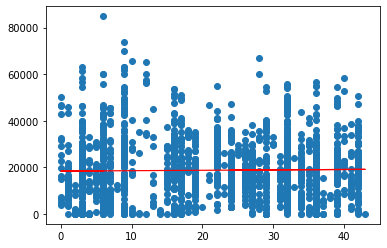

In [ ]:
plt.scatter(x, y)
plt.plot(x, slr.predict(x), color='red', linewidth=1.2)

In [ ]:
print('MSE: {:.3f}'.format(mean_squared_error(y, y_pred)))

MSE: 146693891.638
